# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from time import sleep
from IPython import display
from sklearn.metrics import silhouette_score

# Load Dataset

In [2]:
# dataset
X = np.array([
            [3, 4, 3, 2, 1],
            [4, 3, 5, 1, 1],
            [3, 5, 3, 3, 3],
            [2, 1, 3, 3, 2],
            [1, 1, 3, 2, 3]
            ])

# Training

In [3]:
# training model
model = AffinityPropagation()
model.fit( X )
# clustering data
labels = model.predict( X )
print(labels)

[0 0 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


# Novo Exemplo com make bblobs

In [4]:
X, _ = make_blobs( n_samples=300,
                   centers=4,
                   cluster_std=0.6,
                   random_state=0
                 )

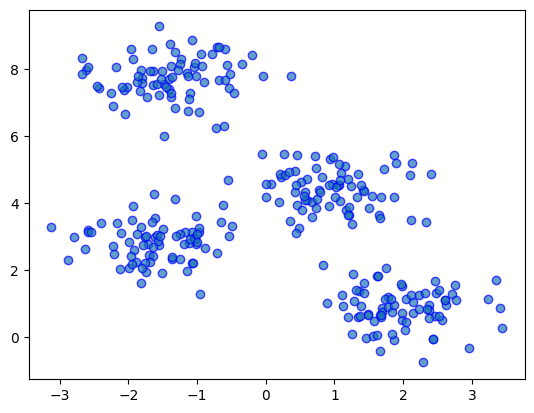

In [5]:
plt.scatter(X[:,0],X[:,1],alpha=0.7,edgecolors='b')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


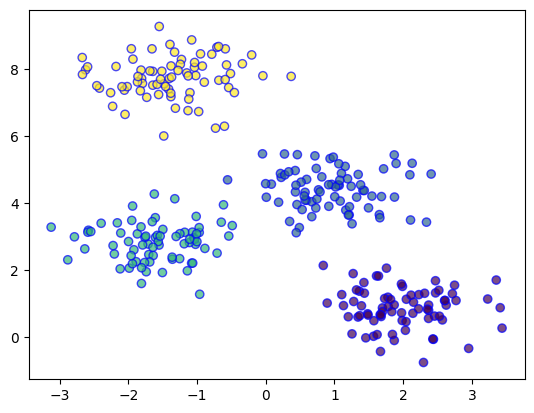

In [6]:
model = AffinityPropagation(preference=-50)
model.fit(X)
labels = model.predict(X)

plt.scatter( X[:,0]
            ,X[:,1]
            ,c=labels
            ,alpha=0.7
            ,edgecolors='b'
            )

# Convergendo o cluster de forma visual

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs


In [8]:

X, _ = make_blobs( n_samples=300,
                   centers=4,
                   cluster_std=0.6,
                   random_state=0
                 )

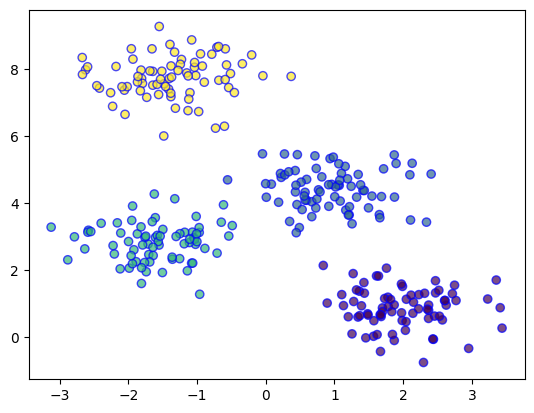

4


<Figure size 640x480 with 0 Axes>

In [9]:
p = np.arange(-1,-61,-1)
fig = plt.figure()

for i in range( len( p ) ):
    model = AffinityPropagation(preference=p[i])
    model.fit(X)
    labels = model.predict(X)
    plt.scatter( X[:,0]
            ,X[:,1]
            ,c=labels
            ,alpha=0.7
            ,edgecolors='b'
            )
    display.clear_output( wait=True)
    plt.show()
    plt.gcf()
    sleep(0.5)

    
    print( len( np.unique( labels )))

# Convergendo o cluster de forma não visual

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

In [11]:
X, _ = make_blobs( n_samples=300,
                   centers=4,
                   cluster_std=0.6,
                   random_state=0
                 )

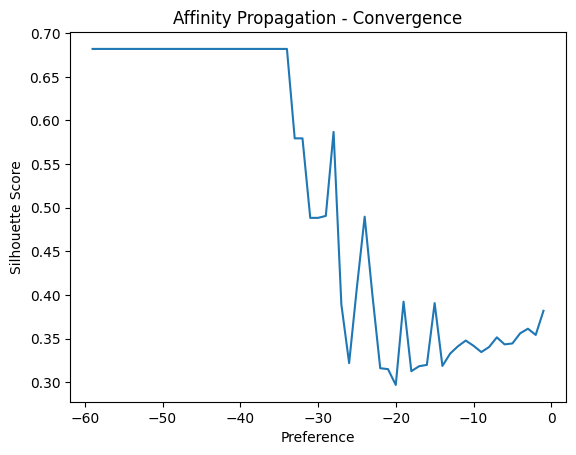

<Figure size 640x480 with 0 Axes>

In [17]:
p = np.arange(-1,-61,-1)
ss_list = []

fig = plt.figure()
for i in range( len( p ) ):
    model = AffinityPropagation( preference=p[i] )
    model.fit( X )
    labels = model.predict( X )
    # Metric
    ss = silhouette_score( X, labels )
    ss_list.append( ss )
    # Plot
    plt.plot( p[:i], ss_list[:i] )
    
    plt.title( 'Affinity Propagation - Convergence' );
    plt.xlabel( 'Preference' );
    plt.ylabel( 'Silhouette Score' )
    display.clear_output(wait=True)
    plt.show()
    plt.gcf()
    sleep(0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


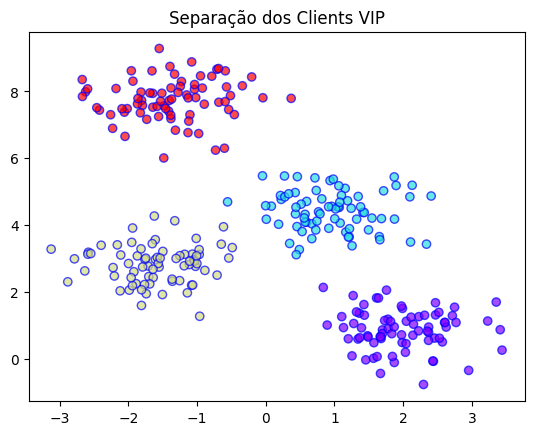

In [15]:
# Showing final Clustering
max_index = ss_list.index( max( ss_list ) )
af = AffinityPropagation( preference=p[max_index] )
clustering = af.fit(X)
fig = plt.figure()
plt.title( "Separação dos Clients VIP")
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b');